# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [320]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [321]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [322]:
#  1. Get the total rides for each city type
Total_Rides= pyber_data_df.groupby(["type"]).count()["ride_id"]
Total_Rides.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [323]:
# 2. Get the total drivers for each city type
Total_Drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
Total_Drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [324]:
#  3. Get the total amount of fares for each city type
Total_Fares = pyber_data_df.groupby(["type"]).sum()["fare"]
Total_Fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [325]:
#  4. Get the average fare per ride for each city type. 


In [326]:
Average_Fare_per_Ride = pyber_data_df.groupby(["type"]).mean()["fare"]
Average_Fare_per_Ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [327]:
Average_Fare_per_Ride.mean()

30.039780102564105

In [328]:
# 5. Get the average fare per driver for each city type. 
Average_Fare_per_Driver=  Total_Fares/Total_Drivers
Average_Fare_per_Driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [329]:
Average_Fare_per_Driver.mean()


37.18682137082137

In [330]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df=pd.DataFrame(
    {"Total Rides": Total_Rides,
     "Total Drivers": Total_Drivers,
     "Total_Fares": Total_Fares,
     "Average Fare per Ride": Average_Fare_per_Ride,
     "Average Fare per Driver": Average_Fare_per_Driver})
pyber_summary_df

,Total Rides,Total Drivers,Total_Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [331]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total_Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [332]:
#  8. Format the columns.
pyber_summary_df["Total_Fares"] = pyber_summary_df["Total_Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total_Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [345]:
# 1. Read the merged DataFrame
pyber_data_df.head(10)


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [348]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
types_dates_count = pyber_data_df.groupby(["date", "type"]).sum()["fare"]
types_dates_count

date                 type    
2019-01-01 00:08:16  Urban       37.91
2019-01-01 00:46:46  Suburban    47.74
2019-01-01 02:07:24  Suburban    24.07
2019-01-01 03:46:50  Urban        7.57
2019-01-01 05:23:21  Urban       10.75
                                 ...  
2019-05-08 04:20:00  Urban       21.99
2019-05-08 04:39:49  Urban       18.45
2019-05-08 07:29:01  Urban       18.55
2019-05-08 11:38:35  Urban       19.77
2019-05-08 13:10:18  Urban       18.04
Name: fare, Length: 2375, dtype: float64

In [349]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
types_dates_count = types_dates_count.reset_index()
types_dates_count

,date,type,fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74
2,2019-01-01 02:07:24,Suburban,24.07
3,2019-01-01 03:46:50,Urban,7.57
4,2019-01-01 05:23:21,Urban,10.75
...,...,...,...
2370,2019-05-08 04:20:00,Urban,21.99
2371,2019-05-08 04:39:49,Urban,18.45
2372,2019-05-08 07:29:01,Urban,18.55
2373,2019-05-08 11:38:35,Urban,19.77


In [356]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_pivot_table = pd.pivot_table(types_dates_count, values='fare', index = 'date', columns ='type')

pyber_pivot_table.head(10)
pyber_pivot_table.count

<bound method DataFrame.count of type                 Rural  Suburban  Urban
date                                       
2019-01-01 00:08:16    NaN       NaN  37.91
2019-01-01 00:46:46    NaN     47.74    NaN
2019-01-01 02:07:24    NaN     24.07    NaN
2019-01-01 03:46:50    NaN       NaN   7.57
2019-01-01 05:23:21    NaN       NaN  10.75
...                    ...       ...    ...
2019-05-08 04:20:00    NaN       NaN  21.99
2019-05-08 04:39:49    NaN       NaN  18.45
2019-05-08 07:29:01    NaN       NaN  18.55
2019-05-08 11:38:35    NaN       NaN  19.77
2019-05-08 13:10:18    NaN       NaN  18.04

[2375 rows x 3 columns]>

In [351]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
loc_pyber_pivottable = pyber_pivot_table.loc['2019-01-01':'2019-04-29']
loc_pyber_pivottable.head(10)


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [338]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
loc_pyber_pivottable.index = pd.to_datetime(loc_pyber_pivottable.index)
loc_pyber_pivottable.index


DatetimeIndex(['2019-01-01 00:08:16', '2019-01-01 00:46:46',
               '2019-01-01 02:07:24', '2019-01-01 03:46:50',
               '2019-01-01 05:23:21', '2019-01-01 09:45:36',
               '2019-01-01 12:32:48', '2019-01-01 14:40:14',
               '2019-01-01 14:42:25', '2019-01-01 14:52:06',
               ...
               '2019-05-07 20:05:15', '2019-05-07 20:22:19',
               '2019-05-07 20:40:29', '2019-05-08 01:54:18',
               '2019-05-08 02:31:25', '2019-05-08 04:20:00',
               '2019-05-08 04:39:49', '2019-05-08 07:29:01',
               '2019-05-08 11:38:35', '2019-05-08 13:10:18'],
              dtype='datetime64[ns]', name='date', length=2375, freq=None)

In [339]:
# 7. Check that the datatype for the index is datetime using df.info()
loc_pyber_pivottable.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 74.2 KB


In [340]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
loc_pyber_pivottable_res=loc_pyber_pivottable.resample('W').sum()

loc_pyber_pivottable_res.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19 entries, 2019-01-06 to 2019-05-12
Freq: W-SUN
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     19 non-null     float64
 1   Suburban  19 non-null     float64
 2   Urban     19 non-null     float64
dtypes: float64(3)
memory usage: 608.0 bytes


In [343]:
loc_pyber_pivottable_res.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


<function matplotlib.pyplot.legend(*args, **kwargs)>

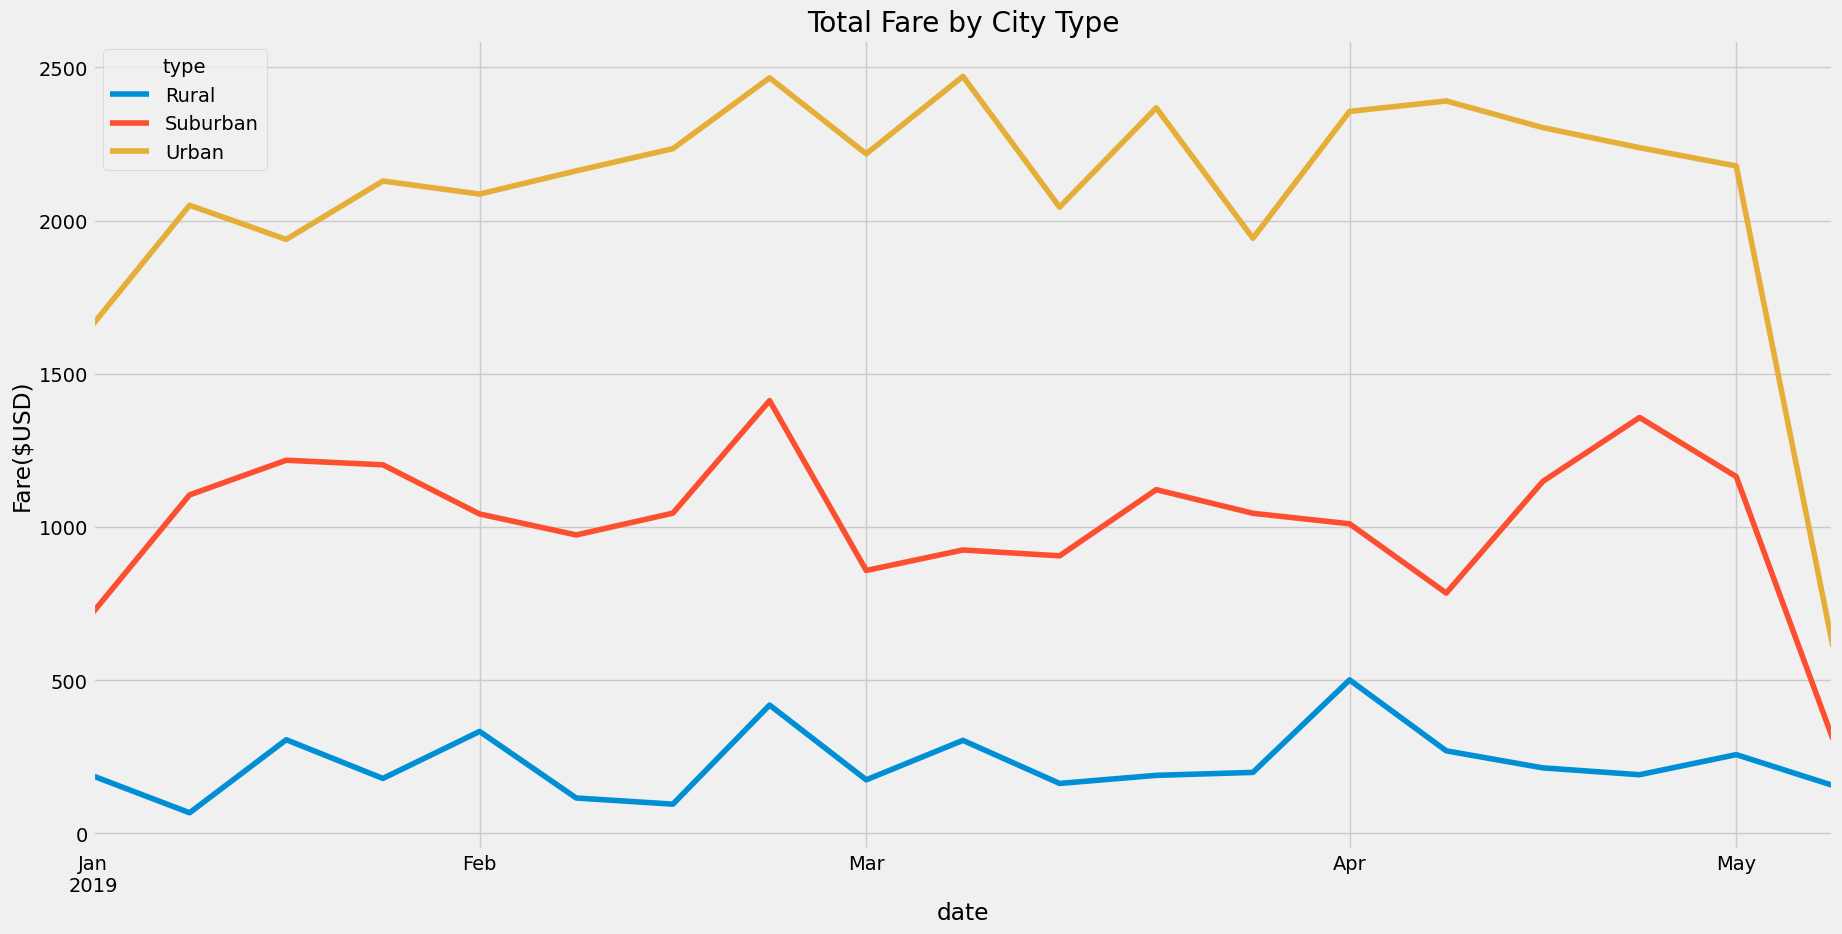

In [344]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

loc_pyber_pivottable_res.plot(figsize=(20,10))
plt.ylabel("Fare($USD)")
plt.title("Total Fare by City Type")

#Save Figure
plt.savefig("analysis/PyBer_fare_summary")
plt.legend